In [52]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn
import sklearn.preprocessing     # For StandardScaler
import sklearn.linear_model      # For LogisticRegression
import sklearn.neural_network    # For MLPClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix,accuracy_score, f1_score, recall_score, precision_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

# Load Dataset

In [53]:
data = pd.read_csv("datasets/processed_manifest_final.csv")
data

,Unnamed: 0,id,ACCESS_ALL_DOWNLOADS,ACCESS_BLUETOOTH_SHARE,ACCESS_CACHE_FILESYSTEM,ACCESS_CHECKIN_PROPERTIES,ACCESS_DOWNLOAD_MANAGER,ACCESS_DOWNLOAD_MANAGER_ADVANCED,ACCESS_LOCATION_EXTRA_COMMANDS,ACCESS_MOCK_LOCATION,...,WRITE_GSERVICES,WRITE_MEDIA_STORAGE,WRITE_PROFILE,WRITE_SECURE_SETTINGS,WRITE_SETTINGS,WRITE_SMS,WRITE_SOCIAL_STREAM,WRITE_SYNC_SETTINGS,WRITE_USER_DICTIONARY,is_malicious
0,0,0864acb063671894c80220d3f77cbcdcb08f4aabf017cf...,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,1
1,1,477c68553ff88f831026e8842fe99fe14b2ddf08821a0c...,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
2,2,a0371b342482a12a1932b6930f24c5cb84226c325d9e25...,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,3,26d4ebb9a6693d71077f86794f28f1480db6d096c95ecb...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,4,361c51f12ffc337eb1293a1f49c1a5034ca708a9a46ac4...,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10773,10773,Sha256_000C32D446A831E36F727F1331B0579FFC6EF8E...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10774,10774,Sha256_000869C011E1C7D6A0DF34BB712A2851E736B9C...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10775,10775,Sha256_000C3CF07E99F07C41C685E10978410238609A0...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10776,10776,Sha256_00223AD0498407AF755A9C8D842C9FA5EDCF2E2...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
X = data.drop(['Unnamed: 0', "id", "is_malicious"], axis=1)  # Features
y = data["is_malicious"]  # Label

In [55]:
X = X.to_numpy().astype('float32' )
y = y.to_numpy().astype('int32')

In [56]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=1)

In [57]:
print("X:", X_train.shape, X_train.dtype)
print("y:", y_train.shape, y_train.dtype)

X: (8622, 152) float32
y: (8622,) int32


In [58]:
#prepocess data
scaler = sklearn.preprocessing.StandardScaler().fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [59]:
Performance = pd.DataFrame()
Metrics=['Accuracy','Recall','Precision','F1-score']
Performance['Metrics'] = Metrics

# Decision tree

In [60]:
dt=sklearn.tree.DecisionTreeClassifier()
dt.fit(X_train,y_train)

y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)



In [61]:
t_acc = accuracy_score(y_train, y_pred_train)
t_f1 = f1_score(y_train, y_pred_train)
t_recall = recall_score(y_train, y_pred_train)
t_precision = precision_score(y_train, y_pred_train)
print('Train accuracy : %.2f%%'% (100*t_acc) )
print('Train f1 : %.2f%%'% (100*t_f1) )
print('Train recall : %.2f%%'% (100*t_recall) )
print('Train precision : %.2f%%'% (100*t_precision) )

Train accuracy : 89.16%
Train f1 : 89.06%
Train recall : 86.08%
Train precision : 92.24%


In [62]:
acc = accuracy_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
print('Test accuracy : %.2f%%'% (100*acc) )
print('Test f1 : %.2f%%'% (100*f1) )
print('Test recall : %.2f%%'% (100*recall) )
print('Test precision : %.2f%%'% (100*precision) )

Performance['Decision Tree'] = [acc,recall,precision,f1]

Test accuracy : 86.41%
Test f1 : 86.74%
Test recall : 84.85%
Test precision : 88.70%


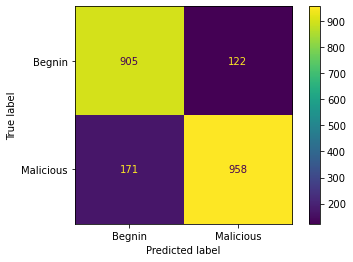

In [63]:
plot_confusion_matrix(dt, X_test, y_test, display_labels=['Begnin','Malicious']) 
plt.show()

# Random Forest

In [64]:
rf=sklearn.ensemble.RandomForestClassifier(random_state=0,n_estimators=3)
rf.fit(X_train,y_train)

y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

In [65]:
t_acc = accuracy_score(y_train, y_pred_train)
t_f1 = f1_score(y_train, y_pred_train)
t_recall = recall_score(y_train, y_pred_train)
t_precision = precision_score(y_train, y_pred_train)
print('Train accuracy : %.2f%%'% (100*t_acc) )
print('Train f1 : %.2f%%'% (100*t_f1) )
print('Train recall : %.2f%%'% (100*t_recall) )
print('Train precision : %.2f%%'% (100*t_precision) )

Train accuracy : 88.65%
Train f1 : 88.65%
Train recall : 86.49%
Train precision : 90.91%


In [66]:
acc = accuracy_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
print('Test accuracy : %.2f%%'% (100*acc) )
print('Test f1 : %.2f%%'% (100*f1) )
print('Test recall : %.2f%%'% (100*recall) )
print('Test precision : %.2f%%'% (100*precision) )

Performance['Random Forest'] = [acc,recall,precision,f1]

Test accuracy : 85.76%
Test f1 : 86.24%
Test recall : 85.21%
Test precision : 87.30%


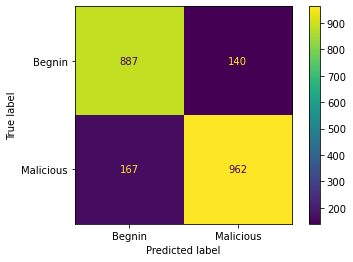

In [67]:
plot_confusion_matrix(rf, X_test, y_test, display_labels=['Begnin','Malicious']) 
plt.show()

# Logistic Regression

In [68]:
lr = sklearn.linear_model.LogisticRegression(C=0.01, random_state=0)  # C=0.01 from Exercise 1.4
lr.fit(X_train, y_train)

LogisticRegression(C=0.01, random_state=0)

In [69]:
t_acc = accuracy_score(y_train, y_pred_train)
t_f1 = f1_score(y_train, y_pred_train)
t_recall = recall_score(y_train, y_pred_train)
t_precision = precision_score(y_train, y_pred_train)
print('Train accuracy : %.2f%%'% (100*t_acc) )
print('Train f1 : %.2f%%'% (100*t_f1) )
print('Train recall : %.2f%%'% (100*t_recall) )
print('Train precision : %.2f%%'% (100*t_precision) )

Train accuracy : 88.65%
Train f1 : 88.65%
Train recall : 86.49%
Train precision : 90.91%


In [70]:
acc = accuracy_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
print('Test accuracy : %.2f%%'% (100*acc) )
print('Test f1 : %.2f%%'% (100*f1) )
print('Test recall : %.2f%%'% (100*recall) )
print('Test precision : %.2f%%'% (100*precision) )

Performance['LR'] = [acc,recall,precision,f1]

Test accuracy : 85.76%
Test f1 : 86.24%
Test recall : 85.21%
Test precision : 87.30%


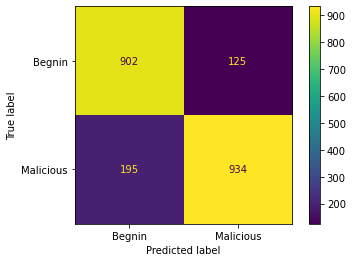

In [71]:
plot_confusion_matrix(lr, X_test, y_test, display_labels=['Begnin','Malicious']) 
plt.show()

# KNN

In [72]:
for k in range(2,8):
    knn = neigh =  sklearn.neighbors.KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
    y_pred_train = knn.predict(X_train)
    y_pred_test = knn.predict(X_test)

    acc_train = sklearn.metrics.accuracy_score(y_pred_train, y_train)
    acc_test = sklearn.metrics.accuracy_score(y_pred_test, y_test)
    print('Train accuracy : %.2f%%'% (100*acc_train))
    print('Test accuracy : %.2f%%'% (100*acc_test))

Train accuracy : 84.34%
Test accuracy : 82.51%
Train accuracy : 80.49%
Test accuracy : 79.41%
Train accuracy : 87.08%
Test accuracy : 85.58%
Train accuracy : 86.60%
Test accuracy : 85.48%
Train accuracy : 83.83%
Test accuracy : 82.56%
Train accuracy : 86.31%
Test accuracy : 85.44%


In [73]:
knn = neigh =  sklearn.neighbors.KNeighborsClassifier(n_neighbors=3).fit(X_train,y_train)
y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)

In [74]:
t_acc = accuracy_score(y_train, y_pred_train)
t_f1 = f1_score(y_train, y_pred_train)
t_recall = recall_score(y_train, y_pred_train)
t_precision = precision_score(y_train, y_pred_train)
print('Train accuracy : %.2f%%'% (100*t_acc) )
print('Train f1 : %.2f%%'% (100*t_f1) )
print('Train recall : %.2f%%'% (100*t_recall) )
print('Train precision : %.2f%%'% (100*t_precision) )

Train accuracy : 80.49%
Train f1 : 83.03%
Train recall : 93.10%
Train precision : 74.92%


In [75]:
acc = accuracy_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
print('Test accuracy : %.2f%%'% (100*acc) )
print('Test f1 : %.2f%%'% (100*f1) )
print('Test recall : %.2f%%'% (100*recall) )
print('Test precision : %.2f%%'% (100*precision) )

Performance['KNN'] = [acc,recall,precision,f1]

Test accuracy : 79.41%
Test f1 : 82.42%
Test recall : 92.21%
Test precision : 74.52%


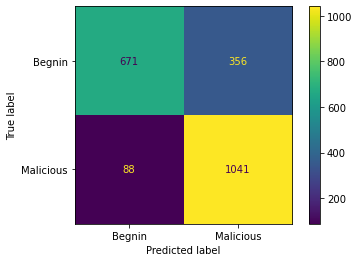

In [76]:
plot_confusion_matrix(knn, X_test, y_test, display_labels=['Begnin','Malicious']) 
plt.show()

# GAUSSIAN NB

In [77]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)

y_pred_train = gnb.predict(X_train)
y_pred_test = gnb.predict(X_test)

In [78]:
t_acc = accuracy_score(y_train, y_pred_train)
t_f1 = f1_score(y_train, y_pred_train)
t_recall = recall_score(y_train, y_pred_train)
t_precision = precision_score(y_train, y_pred_train)
print('Train accuracy : %.2f%%'% (100*t_acc) )
print('Train f1 : %.2f%%'% (100*t_f1) )
print('Train recall : %.2f%%'% (100*t_recall) )
print('Train precision : %.2f%%'% (100*t_precision) )

Train accuracy : 56.74%
Train f1 : 70.30%
Train recall : 99.91%
Train precision : 54.23%


In [79]:
acc = accuracy_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
print('Test accuracy : %.2f%%'% (100*acc) )
print('Test f1 : %.2f%%'% (100*f1) )
print('Test recall : %.2f%%'% (100*recall) )
print('Test precision : %.2f%%'% (100*precision) )

Performance['Gaussian Naive Bayes'] = [acc,recall,precision,f1]

Test accuracy : 57.51%
Test f1 : 71.09%
Test recall : 99.73%
Test precision : 55.22%


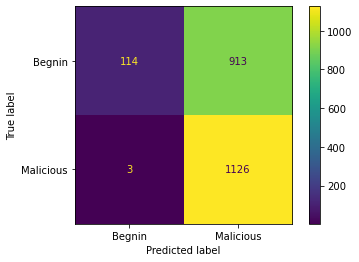

In [80]:
plot_confusion_matrix(gnb, X_test, y_test, display_labels=['Begnin','Malicious']) 
plt.show()

# MLP

In [81]:
mlp = sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(60,20,5),
                                           solver='sgd', batch_size=100, max_iter=100,
                                           learning_rate_init=.01, momentum=0.9,
                                           verbose=True, random_state=0)

mlp.fit(X_train, y_train);

y_pred_train = mlp.predict(X_train)
y_pred_test = mlp.predict(X_test)

Iteration 1, loss = 0.57961994
Iteration 2, loss = 0.36717254
Iteration 3, loss = 0.33543651
Iteration 4, loss = 0.32048000
Iteration 5, loss = 0.31060261
Iteration 6, loss = 0.30335862
Iteration 7, loss = 0.29766039
Iteration 8, loss = 0.29230629
Iteration 9, loss = 0.28820638
Iteration 10, loss = 0.28635489
Iteration 11, loss = 0.28119754
Iteration 12, loss = 0.28119561
Iteration 13, loss = 0.27816797
Iteration 14, loss = 0.27702996
Iteration 15, loss = 0.27533687
Iteration 16, loss = 0.27407269
Iteration 17, loss = 0.27280999
Iteration 18, loss = 0.27127764
Iteration 19, loss = 0.26925420
Iteration 20, loss = 0.26775070
Iteration 21, loss = 0.26752613
Iteration 22, loss = 0.26439007
Iteration 23, loss = 0.26532281
Iteration 24, loss = 0.26390785
Iteration 25, loss = 0.26322266
Iteration 26, loss = 0.26285123
Iteration 27, loss = 0.26144294
Iteration 28, loss = 0.26096426
Iteration 29, loss = 0.26115480
Iteration 30, loss = 0.25818658
Iteration 31, loss = 0.25860547
Iteration 32, los

C:\Program Files\Anaconda3\envs\py38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [82]:
t_acc = accuracy_score(y_train, y_pred_train)
t_f1 = f1_score(y_train, y_pred_train)
t_recall = recall_score(y_train, y_pred_train)
t_precision = precision_score(y_train, y_pred_train)
print('Train accuracy : %.2f%%'% (100*t_acc) )
print('Train f1 : %.2f%%'% (100*t_f1) )
print('Train recall : %.2f%%'% (100*t_recall) )
print('Train precision : %.2f%%'% (100*t_precision) )

Train accuracy : 88.91%
Train f1 : 88.99%
Train recall : 87.44%
Train precision : 90.60%


In [83]:
acc = accuracy_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
print('Test accuracy : %.2f%%'% (100*acc) )
print('Test f1 : %.2f%%'% (100*f1) )
print('Test recall : %.2f%%'% (100*recall) )
print('Test precision : %.2f%%'% (100*precision) )

Performance['MLP'] = [acc,recall,precision,f1]

Test accuracy : 85.95%
Test f1 : 86.49%
Test recall : 85.92%
Test precision : 87.07%


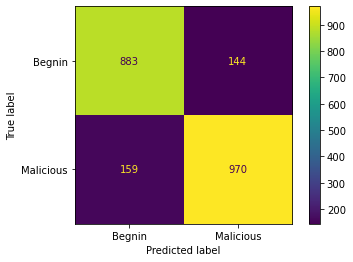

In [84]:
plot_confusion_matrix(mlp, X_test, y_test, display_labels=['Begnin','Malicious']) 
plt.show()

# SVM

In [85]:
y_train_svm = y_train*2 - 1
y_test_svm = y_test*2-1
svm = sklearn.svm.SVC(kernel='linear')
svm.fit(X_train, y_train_svm)

y_pred_train = svm.predict(X_train)
y_pred_test = svm.predict(X_test)

In [86]:
t_acc = accuracy_score(y_train_svm, y_pred_train)
t_f1 = f1_score(y_train_svm, y_pred_train)
t_recall = recall_score(y_train_svm, y_pred_train)
t_precision = precision_score(y_train_svm, y_pred_train)
print('Train accuracy : %.2f%%'% (100*t_acc) )
print('Train f1 : %.2f%%'% (100*t_f1) )
print('Train recall : %.2f%%'% (100*t_recall) )
print('Train precision : %.2f%%'% (100*t_precision) )

Train accuracy : 84.08%
Train f1 : 84.12%
Train recall : 82.28%
Train precision : 86.04%


In [87]:
acc = accuracy_score(y_test_svm, y_pred_test)
f1 = f1_score(y_test_svm, y_pred_test)
recall = recall_score(y_test_svm, y_pred_test)
precision = precision_score(y_test_svm, y_pred_test)
print('Test accuracy : %.2f%%'% (100*acc) )
print('Test f1 : %.2f%%'% (100*f1) )
print('Test recall : %.2f%%'% (100*recall) )
print('Test precision : %.2f%%'% (100*precision) )

Performance['SVM'] = [acc,recall,precision,f1]

Test accuracy : 84.04%
Test f1 : 84.68%
Test recall : 84.23%
Test precision : 85.14%


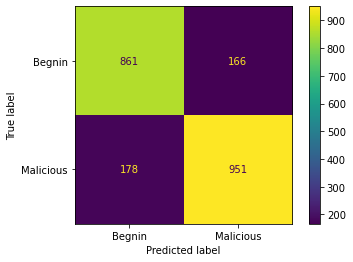

In [88]:
plot_confusion_matrix(svm, X_test, y_test_svm, display_labels=['Begnin','Malicious']) 
plt.show()

# ADA BOOSTING

In [89]:
AdaB= AdaBoostClassifier(n_estimators=3, algorithm='SAMME', random_state=0).fit(X_train,y_train)

y_pred_train = AdaB.predict(X_train)
y_pred_test = AdaB.predict(X_test)

In [90]:
t_acc = accuracy_score(y_train, y_pred_train)
t_f1 = f1_score(y_train, y_pred_train)
t_recall = recall_score(y_train, y_pred_train)
t_precision = precision_score(y_train, y_pred_train)
print('Train accuracy : %.2f%%'% (100*t_acc) )
print('Train f1 : %.2f%%'% (100*t_f1) )
print('Train recall : %.2f%%'% (100*t_recall) )
print('Train precision : %.2f%%'% (100*t_precision) )

Train accuracy : 69.20%
Train f1 : 63.18%
Train recall : 51.57%
Train precision : 81.54%


In [91]:
acc = accuracy_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
print('Test accuracy : %.2f%%'% (100*acc))
print('Test f1 : %.2f%%'% (100*f1) )
print('Test recall : %.2f%%'% (100*recall))
print('Test precision : %.2f%%'% (100*precision))

Performance['Ada Boosting'] = [acc,recall,precision,f1]

Test accuracy : 69.85%
Test f1 : 65.24%
Test recall : 54.03%
Test precision : 82.32%


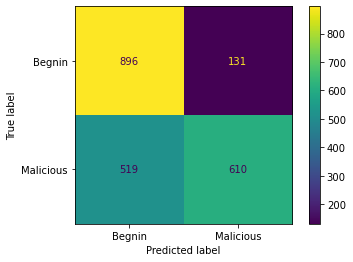

In [92]:
plot_confusion_matrix(AdaB, X_test, y_test, display_labels=['Begnin','Malicious']) 
plt.show()

# RESULTS COMPARISON

In [93]:
Performance

,Metrics,Decision Tree,Random Forest,LR,KNN,Gaussian Naive Bayes,MLP,SVM,Ada Boosting
0,Accuracy,0.864100,0.857607,0.857607,0.794063,0.575139,0.859462,0.840445,0.698516
1,Recall,0.848539,0.852081,0.852081,0.922055,0.997343,0.859167,0.842338,0.540301
2,Precision,0.887037,0.872958,0.872958,0.745168,0.552231,0.870736,0.851388,0.823212
3,F1-score,0.867361,0.862394,0.862394,0.824228,0.710859,0.864913,0.846839,0.652406
